In [1]:
import os, sys, argparse
from upsetplot import from_memberships
from upsetplot import plot
%matplotlib inline 
from matplotlib import pyplot
import numpy as np

def parse_maf(fp):
    ''' Return a dictionary with vars[patient][variant_set]'''
    caller_vars = {}

    fh = open(fp, 'r')
    for line in fh:
        temp = line.strip().split('\t')
        if line[0] == '#' or temp[0] == 'Hugo_Symbol':
            continue
        ID = temp[16] + '_' + temp[17] # 'tumor'_'normal'
        if ID not in caller_vars:
            caller_vars[ID] = set()
        chrom =temp[4]
        s_pos = temp[5]
        e_pos = temp[6]
        ref = temp[11]
        tum_allele_1 = temp[12]
        tum_allele_2 = temp[13]
        gene = temp[47]
        impact = temp[93]
        var = (chrom, s_pos, e_pos, ref, tum_allele_1, tum_allele_2, gene, impact)
        caller_vars[ID].add(var)

    return(caller_vars)
# main
possible_callers = ('mutect', 'muse', 'somaticsniper', 'varscan')
#not all possible cancers, just for testing
possible_cancers = ('ACC', 'BLCA','BRCA','CESC','CHOL','COAD','DLBC','ESCA','GBM','HNSC', 
					'KICH','KIRC','KIRP','LAML','LGG','LIHC','LUAD','LUSC','MESO')
original = os.getcwd()
#print(original)
# saving contents of intersections 
# 1,2,3,4 = muse, mutect, somaticsniper, varscan feed in arguments as such 




In [2]:
def four_set_contents(dat_1, dat_2, dat_3, dat_4):
    data = dict({'muse':[],'mutect':[],'somaticsniper':[], 'varscan':[],
                              'muse+mutect':[], 'muse+somaticsniper':[], 'muse+varscan':[],
                              'mutect+somaticsniper':[], 'mutect+varscan':[], 'somaticsniper+varscan':[],
                              'muse+mutect+somaticsniper':[], 'muse+mutect+varscan':[], 
                              'muse+somaticsniper+varscan':[], 'mutect+somaticsniper+varscan':[], 
                              'muse+mutect+somaticsniper+varscan':[]})
    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys())) & set(list(dat_4.keys()))
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        set_4 = dat_4[patient]
                
        inter = set_1 & set_2 & set_3 & set_4
        interlist = data['muse+mutect+somaticsniper+varscan']#.extend(inter)
        interlist.extend(inter)
        interlist = list(dict.fromkeys(interlist))
        data['muse+mutect+somaticsniper+varscan']= interlist
        
        inter_123 = (set_1 & set_2 & set_3) - inter
        inter123list = data['muse+mutect+somaticsniper']#.extend(inter_123)
        inter123list.extend(inter_123)
        inter123list = list(dict.fromkeys(inter123list))
        data['muse+mutect+somaticsniper']= inter123list 
        
        inter_124 = (set_1 & set_2 & set_4) - inter
        inter124list = data['muse+mutect+varscan']#.extend(inter_124)
        inter124list.extend(inter_124)
        inter124list = list(dict.fromkeys(inter124list))
        data['muse+mutect+varscan']= inter124list
        
        inter_134 = (set_1 & set_3 & set_4) - inter
        inter134list = data['muse+somaticsniper+varscan']#.extend(inter_134)
        inter134list.extend(inter_134)
        inter134list = list(dict.fromkeys(inter134list))
        data['muse+somaticsniper+varscan']= inter134list
        
        inter_234 = (set_2 & set_3 & set_4) - inter
        inter234list = data['mutect+somaticsniper+varscan']#.extend(inter_234)
        inter234list.extend(inter_234)
        inter234list = list(dict.fromkeys(inter234list))
        data['mutect+somaticsniper+varscan']= inter234list 
        
        
        
        inter_12 = (set_1 & set_2) - inter - inter_123 - inter_124
        inter12list = data['muse+mutect']#.extend(inter_12)
        inter12list.extend(inter_12)
        inter12list = list(dict.fromkeys(inter12list))
        data['muse+mutect']= inter12list
        
        inter_13 = (set_1 & set_3) - inter - inter_123 - inter_134
        inter13list = data['muse+somaticsniper']#.extend(inter_13)
        inter13list.extend(inter_13)
        inter13list = list(dict.fromkeys(inter13list))
        data['muse+somaticsniper']= inter13list
        
        inter_14 = (set_1 & set_4) - inter - inter_124 - inter_134
        inter14list = data['muse+varscan']#.extend(inter_14)
        inter14list.extend(inter_14)
        inter14list = list(dict.fromkeys(inter14list))
        data['muse+varscan']= inter14list
        
        inter_23 = (set_2 & set_3) - inter - inter_123 - inter_234
        inter23list = data['mutect+somaticsniper']#.extend(inter_23)
        inter23list.extend(inter_23)
        inter23list = list(dict.fromkeys(inter23list))
        data['mutect+somaticsniper']= inter23list
        
        inter_24 = (set_2 & set_4) - inter - inter_124 - inter_234
        inter24list = data['mutect+varscan']#.extend(inter_24)
        inter24list.extend(inter_24)
        inter24list = list(dict.fromkeys(inter24list))
        data['mutect+varscan']= inter24list
        
        inter_34 = (set_3 & set_4) - inter - inter_234 - inter_134
        inter34list = data['somaticsniper+varscan']#.extend(inter_34)
        inter34list.extend(inter_34)
        inter34list = list(dict.fromkeys(inter34list))
        data['somaticsniper+varscan']=inter34list
        
        
        diff_1 = (set_1) - inter - inter_13 - inter_12 - inter_14 - inter_123 - inter_134 - inter_124
        diff1list = data['muse']#.extend(diff_1)
        diff1list.extend(diff_1)
        diff1list = list(dict.fromkeys(diff1list))
        data['muse']= diff1list
        
        diff_2 = (set_2) - inter - inter_12 - inter_23 - inter_24 - inter_123 - inter_124 - inter_234
        diff2list = data['mutect']#.extend(diff_1)
        diff2list.extend(diff_2)
        diff2list = list(dict.fromkeys(diff2list))
        data['mutect']= diff2list
        
        diff_3 = (set_3) - inter - inter_13 - inter_23 - inter_34 - inter_123 - inter_134 - inter_234
        diff3list = data['somaticsniper']#.extend(diff_3)
        diff3list.extend(diff_3)
        diff3list = list(dict.fromkeys(diff3list))
        data['somaticsniper']= diff3list 
        
        diff_4 = (set_4) - inter - inter_14 - inter_24 - inter_34 - inter_124 - inter_134 - inter_234
        diff4list = data['varscan']#.extend(diff_4)
        diff4list.extend(diff_4)
        diff4list = list(dict.fromkeys(diff4list))
        data['varscan']= diff4list
    
    return data

In [3]:
keys = ('muse','mutect','somaticsniper', 'varscan',
                              'muse+mutect', 'muse+somaticsniper', 'muse+varscan',
                              'mutect+somaticsniper', 'mutect+varscan', 'somaticsniper+varscan',
                              'muse+mutect+somaticsniper', 'muse+mutect+varscan', 
                              'muse+somaticsniper+varscan', 'mutect+somaticsniper+varscan', 
                              'muse+mutect+somaticsniper+varscan')
def how_many_high(cancer, all_variants):
    highcount = []
    for key in keys:
        count = 0
        content = four_set_contents(all_variants[possible_callers[1]], all_variants[possible_callers[0]],
                             all_variants[possible_callers[2]], all_variants[possible_callers[3]])
        for c in content[key]:
            if c[7] == 'HIGH':
                count += 1
        highcount.append(count)
            
    return highcount

#print(how_many_high('ACC'))

In [4]:
def two_set(dat_1, dat_2):
    inter_all = 0
    diff_1_all = 0
    diff_2_all = 0

    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys()))
    dat = []
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        inter = len(set_1 & set_2)
        diff_1 = len(set_1 - set_2)
        diff_2 = len(set_2 - set_1)

        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
    
    dat.extend([inter_all, diff_1_all, diff_2_all])
    return dat


In [5]:
def three_set(dat_1, dat_2, dat_3):

    inter_all = 0
    diff_1_all = 0
    diff_2_all = 0
    diff_3_all = 0
    inter_12_all = 0
    inter_13_all = 0
    inter_23_all = 0

    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys()))
    
    dat = []
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        inter = len(set_1 & set_2 & set_3)
        inter_12 = len(set_1 & set_2) - inter
        inter_13 = len(set_1 & set_3) - inter
        inter_23 = len(set_2 & set_3) - inter
        diff_1 = len(set_1) - inter - inter_13 - inter_12
        diff_2 = len(set_2) - inter - inter_12 - inter_23
        diff_3 = len(set_3) - inter - inter_13 - inter_23
        
        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
        diff_3_all = diff_3_all + diff_3
        inter_12_all = inter_12_all + inter_12
        inter_13_all = inter_13_all + inter_13
        inter_23_all = inter_23_all + inter_23

    dat.extend([inter_all, diff_1_all, diff_2_all, diff_3_all, inter_12_all, inter_13_all, inter_23_all])
    return dat


number of patients: 92
all: 74.53260869565217 60242.40111058602
mutect: 13.130434782608695 358.54820415879027
muse: 2.608695652173913 48.60775047258979
somaticsniper: 1.934782608695652 25.017485822306245
varscan: 11.532608695652174 1083.3576323251418
mutect+muse: 7.163043478260869 244.54950378071825
mutect+somaticsniper: 1.0217391304347827 7.695179584120984
mutect+varscan: 7.260869565217392 299.8884688090738
muse+somaticsniper: 0.532608695652174 2.2706758034026464
muse+varscan: 1.4130434782608696 9.981568998109642
somaticsniper+varscan: 8.228260869565217 572.0674621928165
mutect+muse+somaticsniper: 4.967391304347826 335.053284499055
mutect+muse+varscan: 6.967391304347826 310.74893667296783
mutect+somaticsniper+varscan: 1.7717391304347827 31.958766540642724
muse+somaticsniper+varscan: 6.836956521739131 621.9625472589793
[240, 1208, 178, 1061, 659, 49, 130, 94, 668, 757, 457, 641, 629, 163, 6857]


<Figure size 432x288 with 0 Axes>

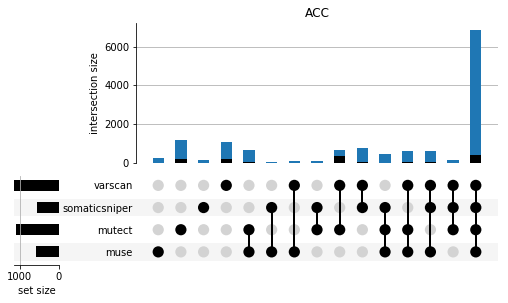

number of patients: 408
all: 198.2156862745098 80898.99269511725
mutect: 38.88970588235294 2664.2500901095736
muse: 10.823529411764707 157.8316032295271
somaticsniper: 1.5318627450980393 4.195063196847366
varscan: 6.811274509803922 63.2854611207228
mutect+muse: 21.612745098039216 837.8206218762015
mutect+somaticsniper: 2.8676470588235294 27.855031718569784
mutect+varscan: 16.323529411764707 259.57670126874274
muse+somaticsniper: 0.5122549019607843 0.7106341311034218
muse+varscan: 4.482843137254902 40.234999759707804
somaticsniper+varscan: 2.409313725490196 23.972168156478283
mutect+muse+somaticsniper: 4.737745098039215 46.762104719338716
mutect+muse+varscan: 40.13235294117647 3274.3256199538637
mutect+somaticsniper+varscan: 6.512254901960785 58.25965373894656
muse+somaticsniper+varscan: 11.411764705882353 351.64907727797
[4416, 15867, 625, 2779, 8818, 209, 1829, 1170, 6660, 983, 1933, 16374, 4656, 2657, 80872]


<Figure size 432x288 with 0 Axes>

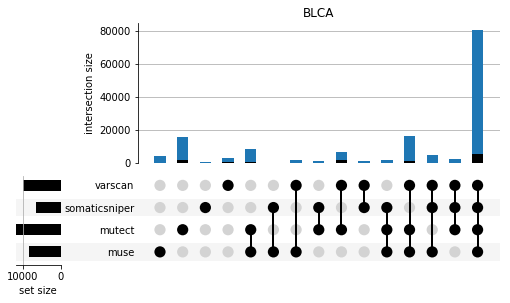

number of patients: 975
all: 58.550769230769234 31956.50793530572
mutect: 25.68 3482.2565743589744
muse: 3.562051282051282 101.84820092044707
somaticsniper: 0.7671794871794871 1.4832305062458908
varscan: 4.821538461538461 153.6317412228797
mutect+muse: 9.302564102564103 940.6089677843523
mutect+somaticsniper: 0.6564102564102564 1.948612754766601
mutect+varscan: 8.793846153846154 635.2795518737673
muse+somaticsniper: 0.19179487179487179 0.3396249835634452
muse+varscan: 1.1917948717948719 73.42680447074292
somaticsniper+varscan: 0.7815384615384615 3.4794540433925047
mutect+muse+somaticsniper: 1.082051282051282 6.143011176857332
mutect+muse+varscan: 17.275897435897434 8452.622342143328
mutect+somaticsniper+varscan: 2.4625641025641025 42.57680368178829
muse+somaticsniper+varscan: 2.0635897435897435 141.93236660092043
[3473, 25038, 748, 4701, 9070, 187, 1162, 640, 8574, 762, 1055, 16844, 2012, 2401, 57087]


In [ ]:
os.chdir(original)
# functions 48, 94

def four_set(dat_1, dat_2, dat_3, dat_4):
    dat = []
    inter_all = 0
    
    interall = []
    
    diff_1_all = 0
    diff_2_all = 0
    diff_3_all = 0
    diff_4_all = 0
    
    diff1all = []
    diff2all = []
    diff3all = []
    diff4all = []
    
    inter_12_all = 0
    inter_13_all = 0
    inter_14_all = 0
    inter_23_all = 0
    inter_24_all = 0
    inter_34_all = 0
    
    inter12all = []
    inter13all = []
    inter14all = []
    inter23all = []
    inter24all = []
    inter34all = []
    
    inter_123_all = 0
    inter_124_all = 0
    inter_134_all = 0
    inter_234_all = 0    
    
    inter123all = []
    inter124all = []
    inter134all = []
    inter234all = []
    
    set1_total = 0
    set2_total = 0
    set3_total = 0
    set4_total = 0
    
    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys())) & set(list(dat_4.keys()))
    total = 0
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        set_4 = dat_4[patient]
        
        set1_total = set1_total + len(set_1)
        set2_total = set2_total + len(set_2)
        set3_total = set3_total + len(set_3)
        set4_total = set4_total + len(set_4)
        
        
        inter = len(set_1 & set_2 & set_3 & set_4)
        interall.append(inter)
        inter_123 = len(set_1 & set_2 & set_3) - inter
        inter123all.append(inter_123)
        inter_124 = len(set_1 & set_2 & set_4) - inter
        inter124all.append(inter_124)
        inter_134 = len(set_1 & set_3 & set_4) - inter
        inter134all.append(inter_134)
        inter_234 = len(set_2 & set_3 & set_4) - inter
        inter234all.append(inter_234)
        
        
        inter_12 = len(set_1 & set_2) - inter - inter_123 - inter_124
        inter12all.append(inter_12)
        inter_13 = len(set_1 & set_3) - inter - inter_123 - inter_134
        inter13all.append(inter_13)
        inter_14 = len(set_1 & set_4) - inter - inter_124 - inter_134
        inter14all.append(inter_14)
        inter_23 = len(set_2 & set_3) - inter - inter_123 - inter_234
        inter23all.append(inter_23)
        inter_24 = len(set_2 & set_4) - inter - inter_124 - inter_234
        inter24all.append(inter_24)
        inter_34 = len(set_3 & set_4) - inter - inter_234 - inter_134
        inter34all.append(inter_34)
        
        diff_1 = len(set_1) - inter - inter_13 - inter_12 - inter_14 - inter_123 - inter_134 - inter_124
        diff1all.append(diff_1)
        diff_2 = len(set_2) - inter - inter_12 - inter_23 - inter_24 - inter_123 - inter_124 - inter_234
        diff2all.append(diff_2)
        diff_3 = len(set_3) - inter - inter_13 - inter_23 - inter_34 - inter_123 - inter_134 - inter_234
        diff3all.append(diff_3)
        diff_4 = len(set_4) - inter - inter_14 - inter_24 - inter_34 - inter_124 - inter_134 - inter_234
        diff4all.append(diff_4)
        
        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
        diff_3_all = diff_3_all + diff_3
        diff_4_all = diff_4_all + diff_4
        inter_12_all = inter_12_all + inter_12
        inter_13_all = inter_13_all + inter_13
        inter_14_all = inter_14_all + inter_14
        inter_23_all = inter_23_all + inter_23
        inter_24_all = inter_24_all + inter_24
        inter_34_all = inter_34_all + inter_34
        inter_123_all = inter_123_all + inter_123
        inter_124_all = inter_124_all + inter_124
        inter_134_all = inter_134_all + inter_134
        inter_234_all = inter_234_all + inter_234
        total = total + len(set_1 & set_2)
    print("number of patients:", len(patients))
    print("all:", np.mean(interall), np.var(interall))
    print("mutect:", np.mean(diff1all), np.var(diff1all))
    print("muse:", np.mean(diff2all), np.var(diff2all))
    print("somaticsniper:", np.mean(diff3all), np.var(diff3all))
    print("varscan:", np.mean(diff4all), np.var(diff4all))
    print("mutect+muse:", np.mean(inter12all), np.var(inter12all))
    print("mutect+somaticsniper:", np.mean(inter13all), np.var(inter13all))
    print("mutect+varscan:", np.mean(inter14all), np.var(inter14all))
    print("muse+somaticsniper:", np.mean(inter23all), np.var(inter23all))
    print("muse+varscan:", np.mean(inter24all), np.var(inter24all))
    print("somaticsniper+varscan:", np.mean(inter34all), np.var(inter34all))
    print("mutect+muse+somaticsniper:", np.mean(inter123all), np.var(inter123all))
    print("mutect+muse+varscan:", np.mean(inter124all), np.var(inter124all))
    print("mutect+somaticsniper+varscan:", np.mean(inter134all), np.var(inter134all))
    print("muse+somaticsniper+varscan:", np.mean(inter234all), np.var(inter234all))
    #print(interall)

    dat.extend([diff_2_all, diff_1_all, diff_3_all, diff_4_all, inter_12_all, inter_23_all, inter_24_all, 
               inter_13_all, inter_14_all, inter_34_all, inter_123_all, inter_124_all, inter_234_all, inter_134_all,
               inter_all])    
    return dat

test = os.getcwd()
#print(test)

for cancer in possible_cancers:
    os.chdir(original)
    os.chdir(cancer)
    mafs = os.listdir()

    maf_fps = {}
    for caller in possible_callers:
        for maf in mafs:
            if caller in maf: # str in the filepath
                maf_fps[caller] = maf

    #print(possible_callers)
    #print(maf_fps)

    # parse maf for each caller
    all_variants = {}
    for caller in maf_fps:
        all_variants[caller] = parse_maf(maf_fps[caller])
        
    num_callers = len(possible_callers)
    dat = []
    
    """
    #two ways
    
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            set_vals = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
            dat.append(set_vals)
            print(possible_callers[i], possible_callers[j])
            print(set_vals)
    """
    """
    # three ways 
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            for k in range(j+1, num_callers):
                set_vals = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
                dat.append(set_vals)
                print(possible_callers[i], possible_callers[j], possible_callers[k])
                print(set_vals)
    
    
    print(four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]]))
    """
    
    # four way intersection    
    dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]])
    print(dat)
    #print(possible_callers[0], possible_callers[1], possible_callers[2], possible_callers[3])
    #print(set_vals)
   
    ### FIX THIS RETURN ORDER BHSDIBGUWHOIEJLNFKBHWIEFUOLNJ
    example = from_memberships([['muse'],['mutect'],['somaticsniper'], ['varscan'],
                              ['muse','mutect'], ['muse','somaticsniper'], ['muse','varscan'],
                              ['mutect','somaticsniper'], ['mutect','varscan'], ['somaticsniper','varscan'],
                              ['muse','mutect','somaticsniper'], ['muse','mutect','varscan'], 
                              ['muse','somaticsniper','varscan'], ['mutect','somaticsniper','varscan'], 
                              ['muse','mutect','somaticsniper','varscan']], data=how_many_high(cancer, all_variants))
    
    #print(example)
    pyplot.figure()
    ax = plot(example, orientation='horizontal', sort_by='degree', sort_sets_by=None)
    # need to extract number of high impact total - number of high impact, write a function to count number of high impact
    ax['intersections'].bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], dat, width=0.5,zorder=3)
    pyplot.title(cancer)
    pyplot.ylabel('intersection size')
    ax['totals'].set_xlabel('set size')
    pyplot.show()

    
    
    


In [ ]:
## os.chdir(original)
possible_cancers = ('OV','PAAD','PCPG','PRAD','READ','SARC','SKCM','STAD','TGCT','THCA','THYM','UCEC','UCS','UVM')
for cancer in possible_cancers:
    os.chdir(original)
    os.chdir(cancer)
    mafs = os.listdir()

    maf_fps = {}
    for caller in possible_callers:
        for maf in mafs:
            if caller in maf: # str in the filepath
                maf_fps[caller] = maf

    #print(possible_callers)
    #print(maf_fps)

    # parse maf for each caller
    all_variants = {}
    for caller in maf_fps:
        all_variants[caller] = parse_maf(maf_fps[caller])
        
    num_callers = len(possible_callers)
    dat = []
    
    """
    #two ways
    
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            set_vals = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
            dat.append(set_vals)
            print(possible_callers[i], possible_callers[j])
            print(set_vals)
    """
    """
    # three ways 
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            for k in range(j+1, num_callers):
                set_vals = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
                dat.append(set_vals)
                print(possible_callers[i], possible_callers[j], possible_callers[k])
                print(set_vals)
    
    
    print(four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]]))
    """
    
   # four way intersection    
    dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]])
    #print(possible_callers[0], possible_callers[1], possible_callers[2], possible_callers[3])
    #print(set_vals)
   
    example = from_memberships([['muse'],['mutect'],['somaticsniper'], ['varscan'],
                              ['muse','mutect'], ['muse','somaticsniper'], ['muse','varscan'],
                              ['mutect','somaticsniper'], ['mutect','varscan'], ['somaticsniper','varscan'],
                              ['muse','mutect','somaticsniper'], ['muse','mutect','varscan'], 
                              ['muse','somaticsniper','varscan'], ['mutect','somaticsniper','varscan'], 
                              ['muse','mutect','somaticsniper','varscan']], data=how_many_high(cancer, all_variants) )
    
    #print(example)
    pyplot.figure()
    ax = plot(example, orientation='horizontal', sort_by='degree', sort_sets_by=None)
    # need to extract number of high impact total - number of high impact, write a function to count number of high impact
    ax['intersections'].bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], dat, width=0.5,zorder=3)
    pyplot.title(cancer)
    pyplot.ylabel('intersection size')
    ax['totals'].set_xlabel('set size')
    pyplot.show()
    
    

In [ ]:
import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4

# BRCA Venn diagrams
os.chdir(original)
os.chdir('BRCA')
mafs = os.listdir()

maf_fps = {}
for caller in possible_callers:
    for maf in mafs:
        if caller in maf: # str in the filepath
            maf_fps[caller] = maf

# parse maf for each caller
all_variants = {}
for caller in maf_fps:
    all_variants[caller] = parse_maf(maf_fps[caller])
        
num_callers = len(possible_callers)
fig, axes = plt.subplots(1, 6, figsize=(24, 4))
#two ways
sub = 0
for i in range(0, num_callers):
    if i == num_callers:
        break
    for j in range(i + 1, num_callers):
        dat = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
        data = []
        data.extend([dat[1], dat[2], dat[0]])
        sets = (possible_callers[i], possible_callers[j])
        subsets = data
        ax = axes[sub]
        venn2(subsets, sets, ax=ax)
        ax.set_title('', fontsize=24)
        sub = sub+1

fig.suptitle('BRCA', fontsize=30)  
plt.show()
plt.clf()

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
# three ways 
sub = 0
for i in range(0, num_callers):
    if i == num_callers:
        break
    for j in range(i + 1, num_callers):
        for k in range(j+1, num_callers):
            dat = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
            data = []
            data.extend([dat[1], dat[2], dat[3], dat[4],dat[5],dat[6],dat[0]])
            sets = (possible_callers[i], possible_callers[j],possible_callers[k])
            subsets = data
            ax = axes[sub]
            venn3(subsets, sets, ax=ax)
            ax.set_title('', fontsize=24)
            sub = sub+1

fig.suptitle('BRCA', fontsize=30)
plt.show()
plt.clf()
import numpy as np
fig, axes = plt.subplots(1, 1, figsize=(7, 7))

# four way intersection    
dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]])
print(dat)
data = []
data.extend([dat[1],dat[0],dat[2],dat[3],dat[4],dat[7],dat[8],dat[5],dat[6],dat[9],dat[10],dat[11],dat[13],dat[12],dat[14]])
sets = (possible_callers[0], possible_callers[1],possible_callers[2], possible_callers[3])
subsets = data
ax = axes
venn4(subsets, sets)
plt.title('BRCA', fontsize=24)
plt.show()
